<a href="https://colab.research.google.com/github/sanket-choudhary-12/Amazon-Product-Review-Sentiment-Analysis-using-RNN/blob/main/Amazon_Product_Review_Sentiment_Analysis_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding,LSTM,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/Amazon-Product-Review-Sentiment-Analysis-using-RNN-Dataset.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [4]:
data.shape

(25000, 2)

In [5]:
data.isnull().sum()

,0
Review,1
Sentiment,0


In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

,0
Review,0
Sentiment,0


In [8]:
data['Sentiment'].value_counts()

,count
Sentiment,
1,5000
2,5000
3,5000
4,5000
5,4999


In [9]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

nltk.download('punkt')

def clean_reviews(text):

  regex=re.compile('<.*?>')
  text=re.sub(regex,'',text)

  pattern=re.compile('[^a-zA-z0-9\s]')
  text=re.sub(pattern,'',text)

  pattern=re.compile('\d+')
  text=re.sub(pattern,'',text)

  text=text.lower()

  text=word_tokenize(text)

  text=[word for word in text if word not in stop_words]

  return text


data['Review']=data['Review'].apply(clean_reviews)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
tokenizer = Tokenizer()

reviews_to_list = data['Review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)

text_sequences = tokenizer.texts_to_sequences(reviews_to_list)

max_words = 500

padded_sequences = pad_sequences(text_sequences, maxlen=max_words)

text_sequences = np.array(padded_sequences)

data = pd.get_dummies(data, columns = ['Sentiment'])



X = pad_sequences(text_sequences, maxlen = max_words)
y = data[['Sentiment_1', 'Sentiment_2', 'Sentiment_3', 'Sentiment_4',
    'Sentiment_5']]
print(X.shape, y.shape)


(24999, 500) (24999, 5)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(19999, 500) (5000, 500) (19999, 5) (5000, 5)


In [14]:
rnn=Sequential(name='Simple_RNN')
rnn.add(Embedding(len(tokenizer.word_index)+1,max_words,input_length=max_words))
rnn.add(SimpleRNN(128,return_sequences=True,activation='relu'))
rnn.add(SimpleRNN(64,activation='relu',return_sequences=False))
rnn.add(Dense(5,activation='softmax'))
print(rnn.summary())

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
rnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
rnn.fit(X_train,y_train,epochs=2,batch_size=64,validation_data=(X_test,y_test),verbose=1)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - accuracy: 0.2935 - loss: 1.5184 - val_accuracy: 0.4204 - val_loss: 1.2810
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 121ms/step - accuracy: 0.5292 - loss: 1.1071 - val_accuracy: 0.4490 - val_loss: 1.2839


In [18]:
print("score", rnn.evaluate(X_test,y_test,verbose=1))

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.4403 - loss: 1.2923
score [1.283890962600708, 0.4490000009536743]


In [26]:
model=Sequential(name='LSTM')
model.add(Embedding(len(tokenizer.word_index)+1,max_words,input_length=max_words))

# Set return_sequences=False for the LSTM layer
model.add(LSTM(150,return_sequences=False)) # Change is on this line
BatchNormalization()
model.add(Dropout(0.2))

model.add(Dense(50,activation='relu'))
BatchNormalization()
model.add(Dropout(0.5))

model.add(Dense(5,activation='softmax'))

print(model.summary)

<bound method Model.summary of <Sequential name=LSTM, built=False>>


In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=3,batch_size=64,validation_data=(X_test,y_test),verbose=1)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.3255 - loss: 1.4753 - val_accuracy: 0.4686 - val_loss: 1.2242
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.5508 - loss: 1.0647 - val_accuracy: 0.4686 - val_loss: 1.2416
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.6743 - loss: 0.8377 - val_accuracy: 0.4482 - val_loss: 1.3744


In [29]:
print("score",model.evaluate(X_test,y_test,verbose=1))

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4426 - loss: 1.3874
score [1.3743661642074585, 0.448199987411499]


Text(0, 0.5, 'Accuracy')

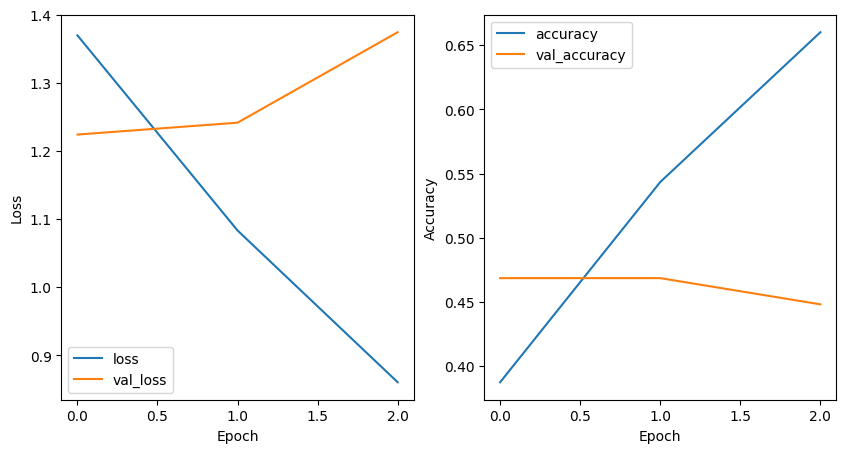

In [30]:
metrics=history.history
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'],
         metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


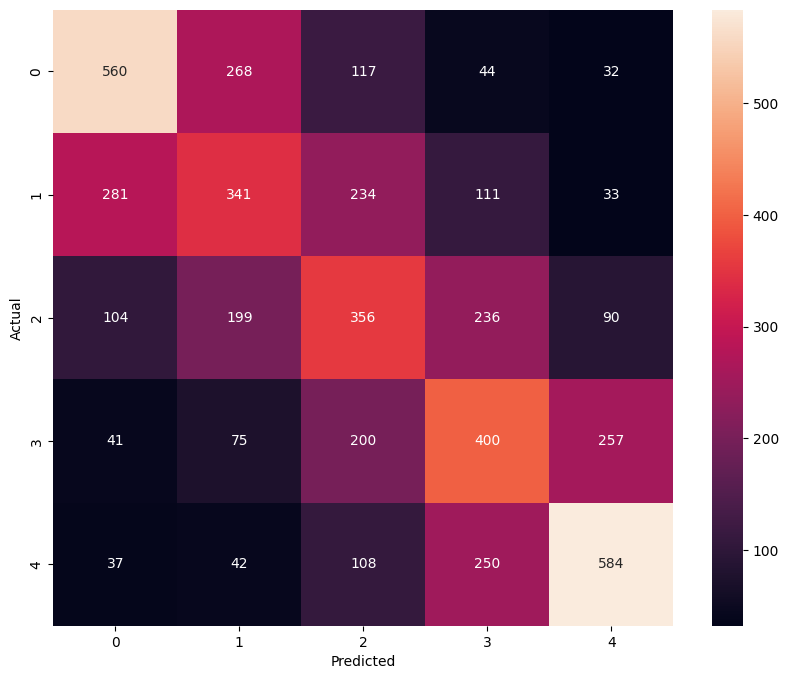

In [37]:
y_true = np.argmax(y_test.values, axis=1)
y_true.shape

# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = tf.math.confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1021
           1       0.37      0.34      0.35      1000
           2       0.35      0.36      0.36       985
           3       0.38      0.41      0.40       973
           4       0.59      0.57      0.58      1021

    accuracy                           0.45      5000
   macro avg       0.45      0.45      0.45      5000
weighted avg       0.45      0.45      0.45      5000



In [39]:
def predict_review_rating(text):
  text_sequences_test=np.array(tokenizer.texts_to_sequences([text]))
  testing=pad_sequences(text_sequences_test,maxlen=max_words)
  y_pred_test=np.argmax(model.predict(testing),axis=1)
  return y_pred_test[0]

rating1=predict_review_rating('worst product')
print(rating1)

rating2=predict_review_rating('good product')
print(rating2)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
4
